In [1]:
import module_loader
import pandas as pd
from bookirds.curves import *
from bookirds.dual import Dual
from bookirds.bsplines import *
import matplotlib.pyplot as plt
x = np.linspace(1,4,101)

# Plotting B-Splines

Plotting the 2nd order, 3rd order and 4th order B-splines below we check that the B-splines produced are accurate around the knot points and demnstrate the correct support at endpoints for all their derivatives.

### Order 2 B-Spline
Below we test a basic, order 2 B-spline. We observe that it has correct endpoint support at x=1 and x=4.

In [2]:
t = np.array([1,1,2,3,4,4])
k = 2
bs = BSpline(t=t, k=k)

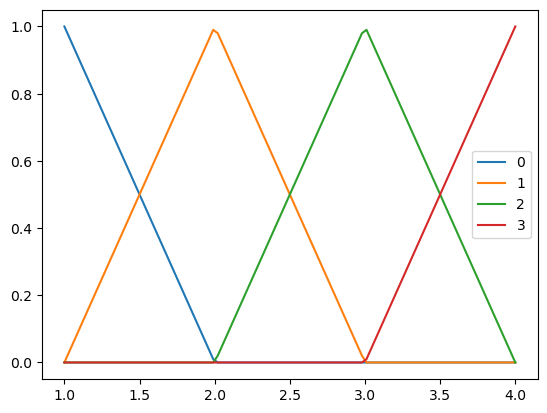

In [3]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bsplev(x, i), label=f'{i}')
ax.legend()
plt.show()

We also examine the derivatives and find that these endpoints are also supported.

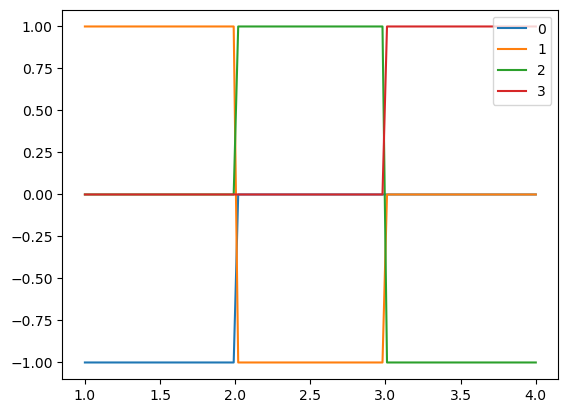

In [4]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 1), label=f'{i}')
ax.legend()
plt.show()

And that all second derivatives are zero as expected.

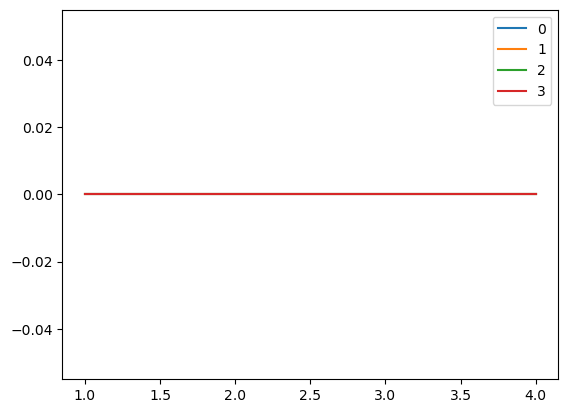

In [5]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 2), label=f'{i}')
ax.legend()
plt.show()

### Order 3 B-Spline

In [6]:
t = np.array([1,1,1,2,2,3,4,4,4])
k = 3
bs = BSpline(t=t, k=k)

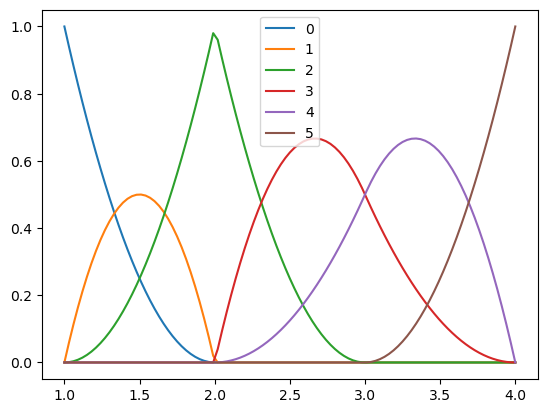

In [7]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bsplev(x, i), label=f'{i}')
ax.legend()
plt.show()

Note the discontinuity at 2, since the knot seqence permits the 1st derivative discontinuity. At 3 it does not. Endpoint support is visible.

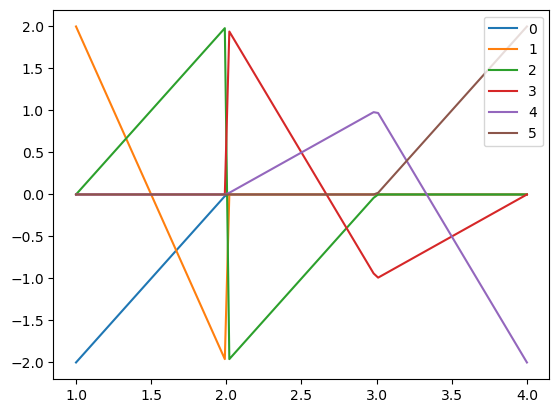

In [8]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 1), label=f'{i}')
ax.legend()
plt.show()

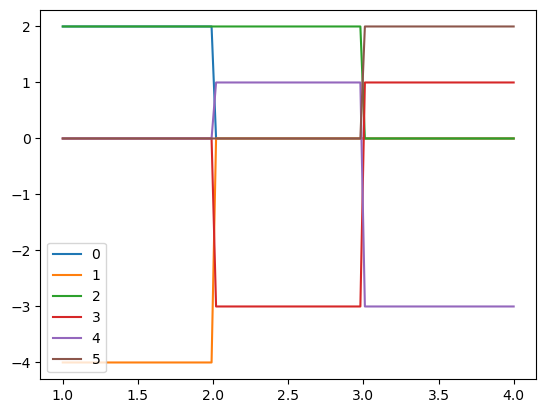

In [9]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 2), label=f'{i}')
ax.legend()
plt.show()

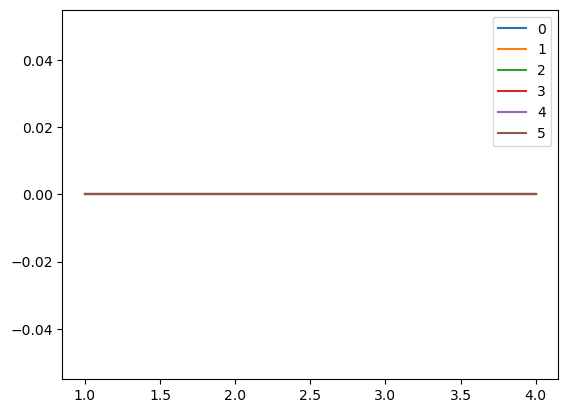

In [10]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 3), label=f'{i}')
ax.legend()
plt.show()

### Order 4 B-Spline

In [11]:
t = np.array([1,1,1,1,2,2,2,3,4,4,4,4])
k = 4
bs = BSpline(t=t, k=k)

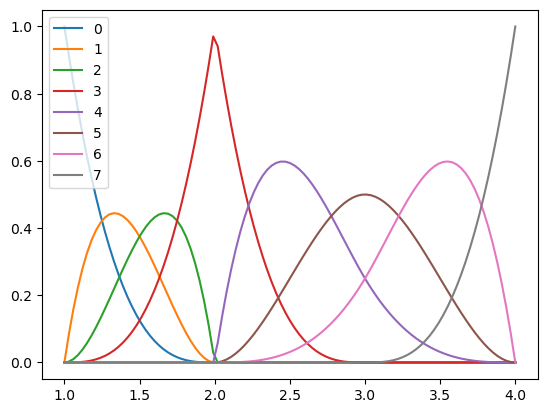

In [12]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bsplev(x, i), label=f'{i}')
ax.legend()
plt.show()

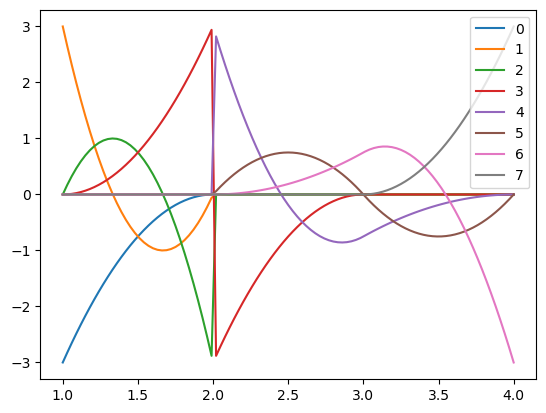

In [13]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 1), label=f'{i}')
ax.legend()
plt.show()

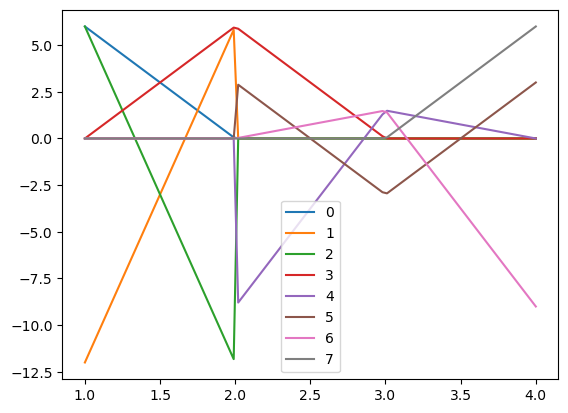

In [14]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 2), label=f'{i}')
ax.legend()
plt.show()

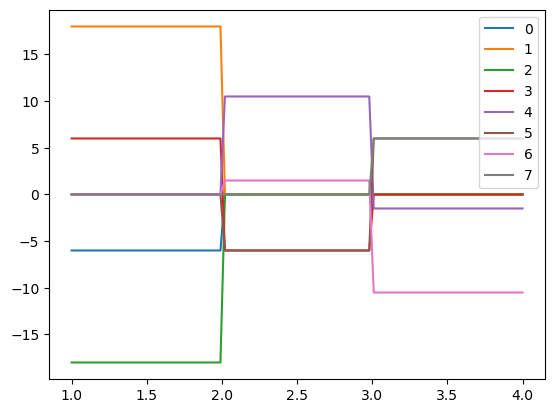

In [15]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 3), label=f'{i}')
ax.legend()
plt.show()

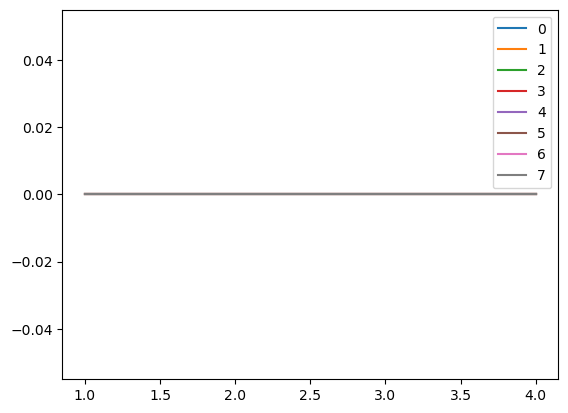

In [16]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 4), label=f'{i}')
ax.legend()
plt.show()

# Approximating Functions

Now we will use 4th order B-splines to approximate the function, $\sin(2x)$, to test the spline coefficients are being solved properly.

In [17]:
x = np.linspace(1, 4, 101)
sin_2x = np.sin(x*2)
t = np.array([1,1,1,1,1.5,2,2.5,3,3.5,4,4,4,4])
tau = np.array([t[i+1:i+4].sum()/3 for i in range(9)])  # Greville Sites
y = np.sin(tau*2)

The first spline 

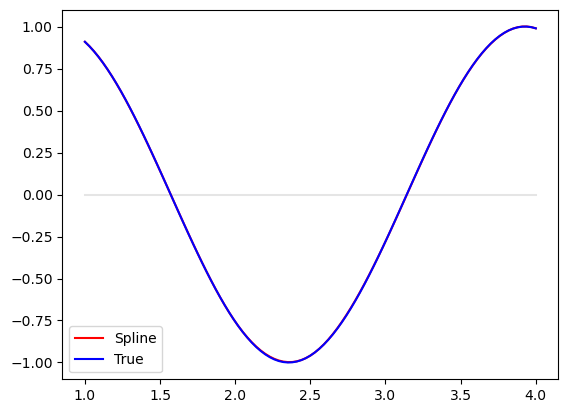

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(x, x*0, c=(0,0,0,0.1))
bs = BSpline(k=4, t=t)
bs.bsplsolve(tau, y, 0, 0)
ax.plot(x, bs.ppev(x), label='Spline', c=(1,0,0))
ax.plot(x, sin_2x, label='True', c=(0,0,1)) 
ax.legend()
plt.show()

The difference, or error, in the approximations is plotted below when different datasites are used to solve the spline.

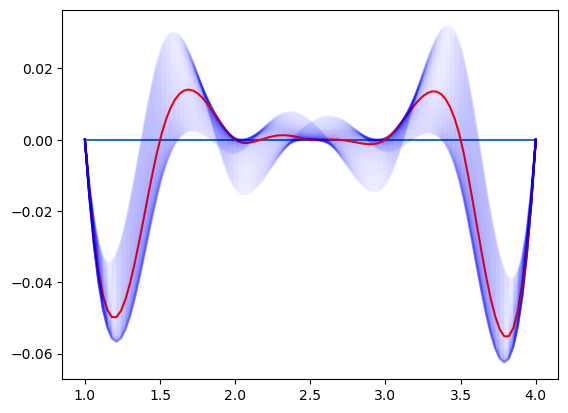

In [19]:
fig, ax = plt.subplots()
ax.plot(x, x*0)
for i in range(99):
    dt = (i-50)*0.0025
    tau = np.array([1, 1, 1.5+dt, 2+dt, 2.5+dt, 3+dt, 3.5+dt, 4, 4])
    y = np.sin(tau*2)
    y[0], y[-1] = 0, 0
    bs = BSpline(k=4, t=t)
    bs.bsplsolve(tau, y, 2, 2)
    c = (1,0,0,1) if i == 50 else (0,0,1,0.05)
    ax.plot(x, bs.ppev(x)-sin_2x, label='Spline', c=c)

plt.show()

In [20]:
bs.ppev_single(4)

np.float64(0.9893582466233818)

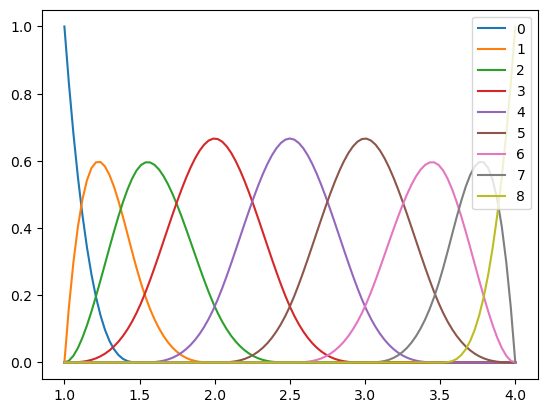

In [21]:
fig, ax = plt.subplots()
for i in range(len(t)-k):
    ax.plot(x, bs.bspldnev(x, i, 0), label=f'{i}')
ax.legend()
plt.show()